# Connecting the halo mass to the stellar mass

We are going to plot the observed Galaxy Stellar Mass Function from  [Baldry et al. 2012](https://arxiv.org/abs/1111.5707) and consider simple ways to go from the halo mass function we measured previously to a stellar mass function.

## The galaxy stellar mass function 

Mass or luminosity functions give an statistical representation of a galaxy population.

* Probability of finding one galaxy in a diferential comoving volume: $dP=n\,dV$, with n as the mean number of objects in a finite volume, V, per unit volume.
* The average total number of objects will be $<N>=nV$.
* Probability of finding a galaxy at a time $t$, within $dV$ with a stellar mass, ${\rm M}_S-\frac{d{\rm M}_S}{2}\le {\rm M}_S \le {\rm M}_S+\frac{d{\rm M}_S}{2}$: 
$dP = \Phi({\rm M}_S,t)d{\rm M}_SdV$
* We refer to $\Phi({\rm M}_S,t)$ as the luminosity function, i.e., the average number of galaxies per stellar mass bin per comoving volume at a given time (or redshift), such that, $ n = \int_{-\infty}^{\infty}\Phi({\rm M}_S,t)d{\rm M}_S $

#### Q.1 Download the observational data from [Baldry et. al 2012](http://www.astro.ljmu.ac.uk/~ikb/research/data/gsmf-B12.txt) and plot it using similar units as those previously used for the halo mass function. What can you infer from the shape of the galaxy stellar mass function?

<IPython.core.display.Javascript object>


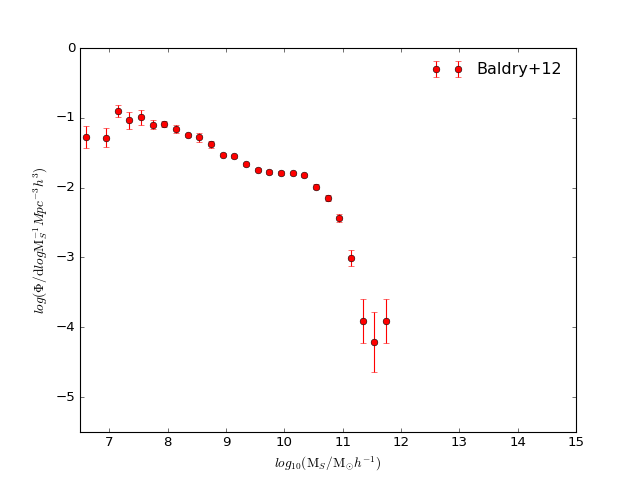

In [8]:
import numpy as np
import eagleSqlTools as sql
from matplotlib import pyplot as plt
import os.path
%matplotlib notebook

# Prepare plot
fig = plt.figure(1)
ytit ='$log(\Phi/{\\rm d}log{\\rm M}_S^{-1}Mpc^{-3}h^{3})$'
xtit ='$log_{10}({\\rm M}_S/{\\rm M}_{\odot}h^{-1})$'
plt.xlabel(xtit) ; plt.ylabel(ytit)
plt.xlim(6.5,15.) ; plt.ylim(-5.5,0)

# Plot the observational data, read from a file in which they have already written in the desired units
ff = 'gsmf-B12-units.txt'
logM, logphi, lerr = np.loadtxt(ff, unpack=True)
plt.errorbar(logM,logphi,yerr=lerr,color='r',ecolor='r',fmt='o',label='Baldry+12')
leg = plt.legend(loc=1) ; leg.draw_frame(False)

The shape of both the galaxy luminosity and stellar mass functions can be described, at least as a first approximation, by a single [Schechter](http://adsabs.harvard.edu/abs/1976ApJ...203..297S) function:

$\phi({\rm M}_S)d{\rm M}_S=\phi ^*\left(\frac{{\rm M}_S}{{\rm M}_S^*}\right)^{\alpha}exp\left(-\frac{{\rm M}_S}{{\rm M}_S^*}\right)d\frac{{\rm M}_S}{{\rm M}_S^*}$

or as a function of the $log_{10}{\rm M}_S$:

$\phi(log_{10}{\rm M}_S)dlog_{10}{\rm M}_S= ln10\cdot\phi ^* 10^{\left(log_{10}{\rm M}_S-log_{10}{\rm M}_S^*\right)(1+\alpha)}{\rm exp}\left(-10^{\left(log_{10}{\rm M}_S-log_{10}{\rm M}_S^*\right)}\right)dlog_{10}{\rm M}_S$

With the advent of more data, a double Schecter funtion was found to be a better description of the the global galaxy luminosity and stellar mass functions and other functional forms have been found to fit better galaxies when further selection criteria are imposed, such as their star formation rate or colour.

#### Q.2 In [Panter et al. 2007](https://arxiv.org/abs/astro-ph/0608531) they fit their observational galaxy stellar mass function to a single Schecter function with the following best values (quoted without errors): $\phi ^*=2.2\cdot 10^{-3}Mpc^{-3}$, ${\rm M}_S^*=1.005\cdot 10^{11}M_{\odot}$ and $\alpha = -1.2$ ($h=0.71$). Plot the corresponding function together with the observational data from Baldry: how do they compare?  Modify the three values defining the Schecter funtion and find out how they affect the output shape. 

<img src='images/obs_gmsf.png'>

In [9]:
# Get the number density expected within Baldry et al. 2012 observations at the $M^*=1.005\cdot 10^{11}M_{\odot}$ 
ms = np.log(1.005) + 11. + np.log10(0.71)
print np.interp(ms, logM, logphi)

-2.30789114212


## Comparing with simple empirical models

#### Q.3 Assume that stars will be found in haloes with the same ratio as the universal baryon fraction ($\Omega _b/\Omega _m$) and use that to convert the halo mass function you produced previously into a stellar mass function. Plot it together with the observations. How do they compare?

<img src='images/halo2gmsf.png'>

#### Q.4 Assume now that forming stars is an inefficient process and that only 20% of the baryons are converted into stars. How this compares with the value you get if you find the value of the efficiency that matches the observed mass function at the knee of the distribution?

#### Q.5 Can you think of a more complicated model to connect the halo mass to the stellar one to reproduce the observations?

## Comparing with a semi-analytical model

Using the  query below get the galaxy stellar mass function from the [De Lucia et al. 2007](https://arxiv.org/abs/astro-ph/0606519) model and compare the results with the previous ones.

<IPython.core.display.Javascript object>


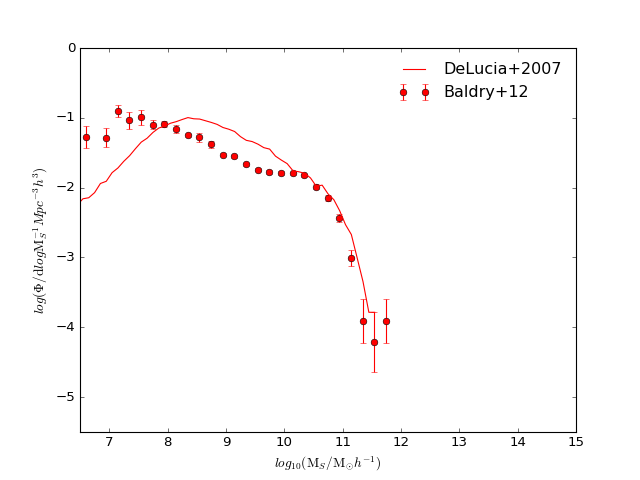

In [10]:
con = sql.connect("xyz", "abc", url="http://virgodb.dur.ac.uk:8080/Millennium")

the_query = """select .1*(.5+floor((log10(stellarMass)+10.)/.1)) as mass,
                      log10(count(*)/power(62.5,3.)/.1) as phi
               from millimil..DeLucia2006a
               where snapnum = 63 and stellarMass > 0 
               group by .1*(.5+floor((log10(stellarMass)+10.)/.1))
               order by mass"""

data = con.execute_query(the_query)

mass = data["mass"] 
phi = data["phi"]


# Prepare plot
fig = plt.figure(2)
plt.xlabel(xtit) ; plt.ylabel(ytit)
plt.xlim(6.5,15.) ; plt.ylim(-5.5,0)

plt.errorbar(logM,logphi,yerr=lerr,color='r',ecolor='r',fmt='o',label='Baldry+12')
plt.plot(mass, phi,'r',label='DeLucia+2007')

leg = plt.legend(loc=1) ; leg.draw_frame(False)

#### Q.6 What physical processes are typically included in semi-analytical models such as the one used in the query above?